In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, \
'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, \
'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, \
'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, \
'id':str, 'sqft_lot':int, 'view':int}
data_house = pd.read_csv('kc_house_train_data.csv',dtype = dtype_dict)


In [5]:
def simple_linear_regression(input_feature, output):
    N = len(input_feature)
    slope_numerator = (input_feature*output).sum() - (input_feature.sum()) * (output.sum())/N
    slope_denominator = (input_feature*input_feature).sum() - input_feature.sum()**2/N
    print(slope_numerator)
    print(slope_denominator)
    slope = slope_numerator/slope_denominator
    intercept = (output.sum() - input_feature.sum()*slope)/N
    print('slope:',slope,'\nintercept:',intercept)
    return slope, intercept

4163173281351.871
14765180927.86142
slope: 281.9588396303426 
intercept: -47116.07907289412


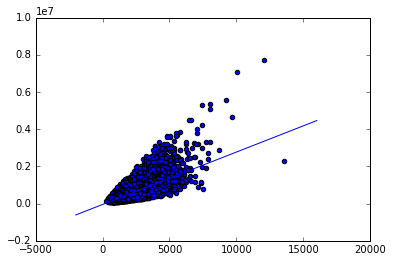

In [6]:
input_feature = data_house['sqft_living']
output = data_house['price']

sqft_slope, sqft_intercept = simple_linear_regression(input_feature, output)
plt.scatter(data_house['sqft_living'], data_house['price'])
x = np.linspace(-2000, 16000)
plt.plot(x,sqft_slope*x+sqft_intercept)

In [7]:
def get_regression_predictions(input_feature, intercept, slope):
    predicted_output = input_feature*slope+intercept
    return(predicted_output)

get_regression_predictions(2650,sqft_intercept,sqft_slope)

700074.8459475138

In [8]:
def get_residual_sum_of_squares(input_feature, output, intercept,slope):
    RSS = ((output - input_feature*slope - intercept)**2).sum()
    return(RSS)

get_residual_sum_of_squares(input_feature,output,sqft_intercept,sqft_slope)/1e15


1.2019183541772855

In [9]:
def inverse_regression_predictions(output, intercept, slope):
    estimated_input = (output - intercept)/slope
    return(estimated_input)

inverse_regression_predictions(800000,sqft_intercept,sqft_slope)

3004.396245152276

In [55]:
from scipy import stats
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts


# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line


data_sqft = pd.DataFrame(data = data_house[['price','sqft_living']])
lm = smf.ols(formula='price~ sqft_living', data=data_sqft).fit()
lm.params

Intercept     -47116.079073
sqft_living      281.958840
dtype: float64

1822394167.037506
14283.322537965956
slope: 127588.95293398784 
intercept: 109473.17762295963


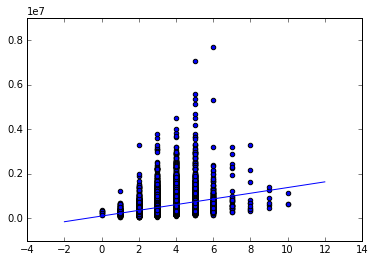

In [15]:
input_feature = data_house['bedrooms']
output = data_house['price']
bed_slope, bed_intercept = simple_linear_regression(input_feature, output)
plt.scatter(data_house['bedrooms'], data_house['price'])
x = np.linspace(-2, 12)
plt.plot(x,bed_slope*x+bed_intercept)

In [16]:
get_residual_sum_of_squares(input_feature,output,bed_intercept,bed_slope)/1e15

2.143244498162069